Rows with NaN values:
     filename domain  max_degree  min_degree  avg_degree  max_degree_node  \
986      nan   Road         NaN         NaN         NaN              NaN   
73       nan    NaN         NaN         NaN         NaN              NaN   
74       nan    NaN         NaN         NaN         NaN              NaN   
75       nan    NaN         NaN         NaN         NaN              NaN   
76       nan    NaN         NaN         NaN         NaN              NaN   
..       ...    ...         ...         ...         ...              ...   
981      nan    NaN         NaN         NaN         NaN              NaN   
982      nan    NaN         NaN         NaN         NaN              NaN   
983      nan    NaN         NaN         NaN         NaN              NaN   
984      nan    NaN         NaN         NaN         NaN              NaN   
985      nan    NaN         NaN         NaN         NaN              NaN   

     avg_degree_node  edges  
986              NaN    NaN  
73  

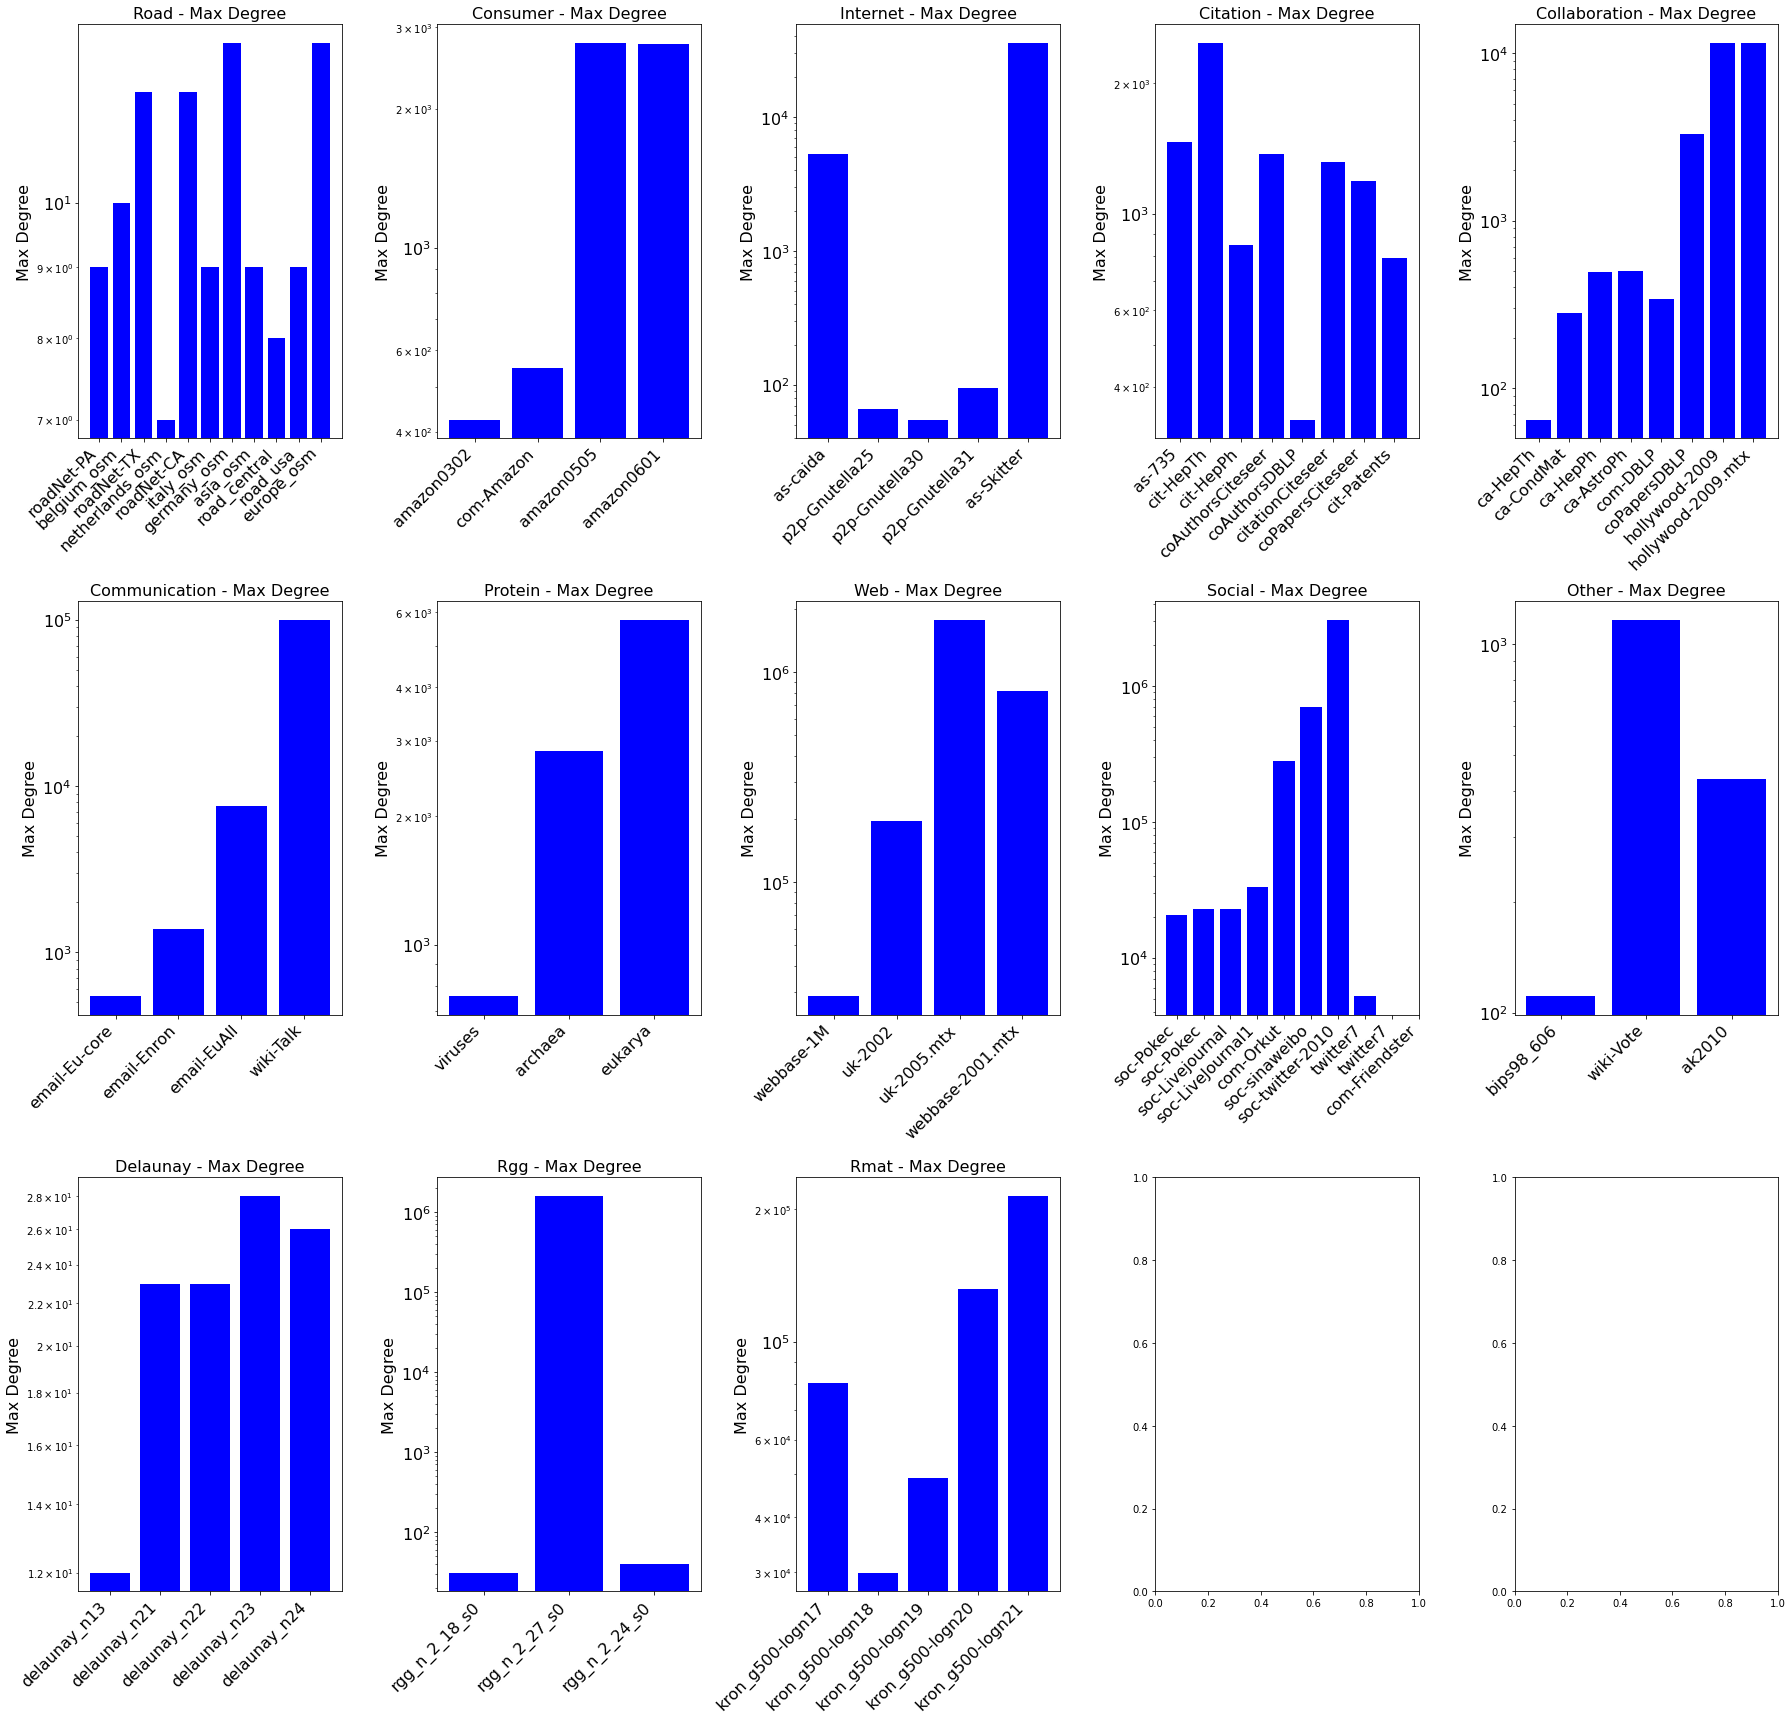

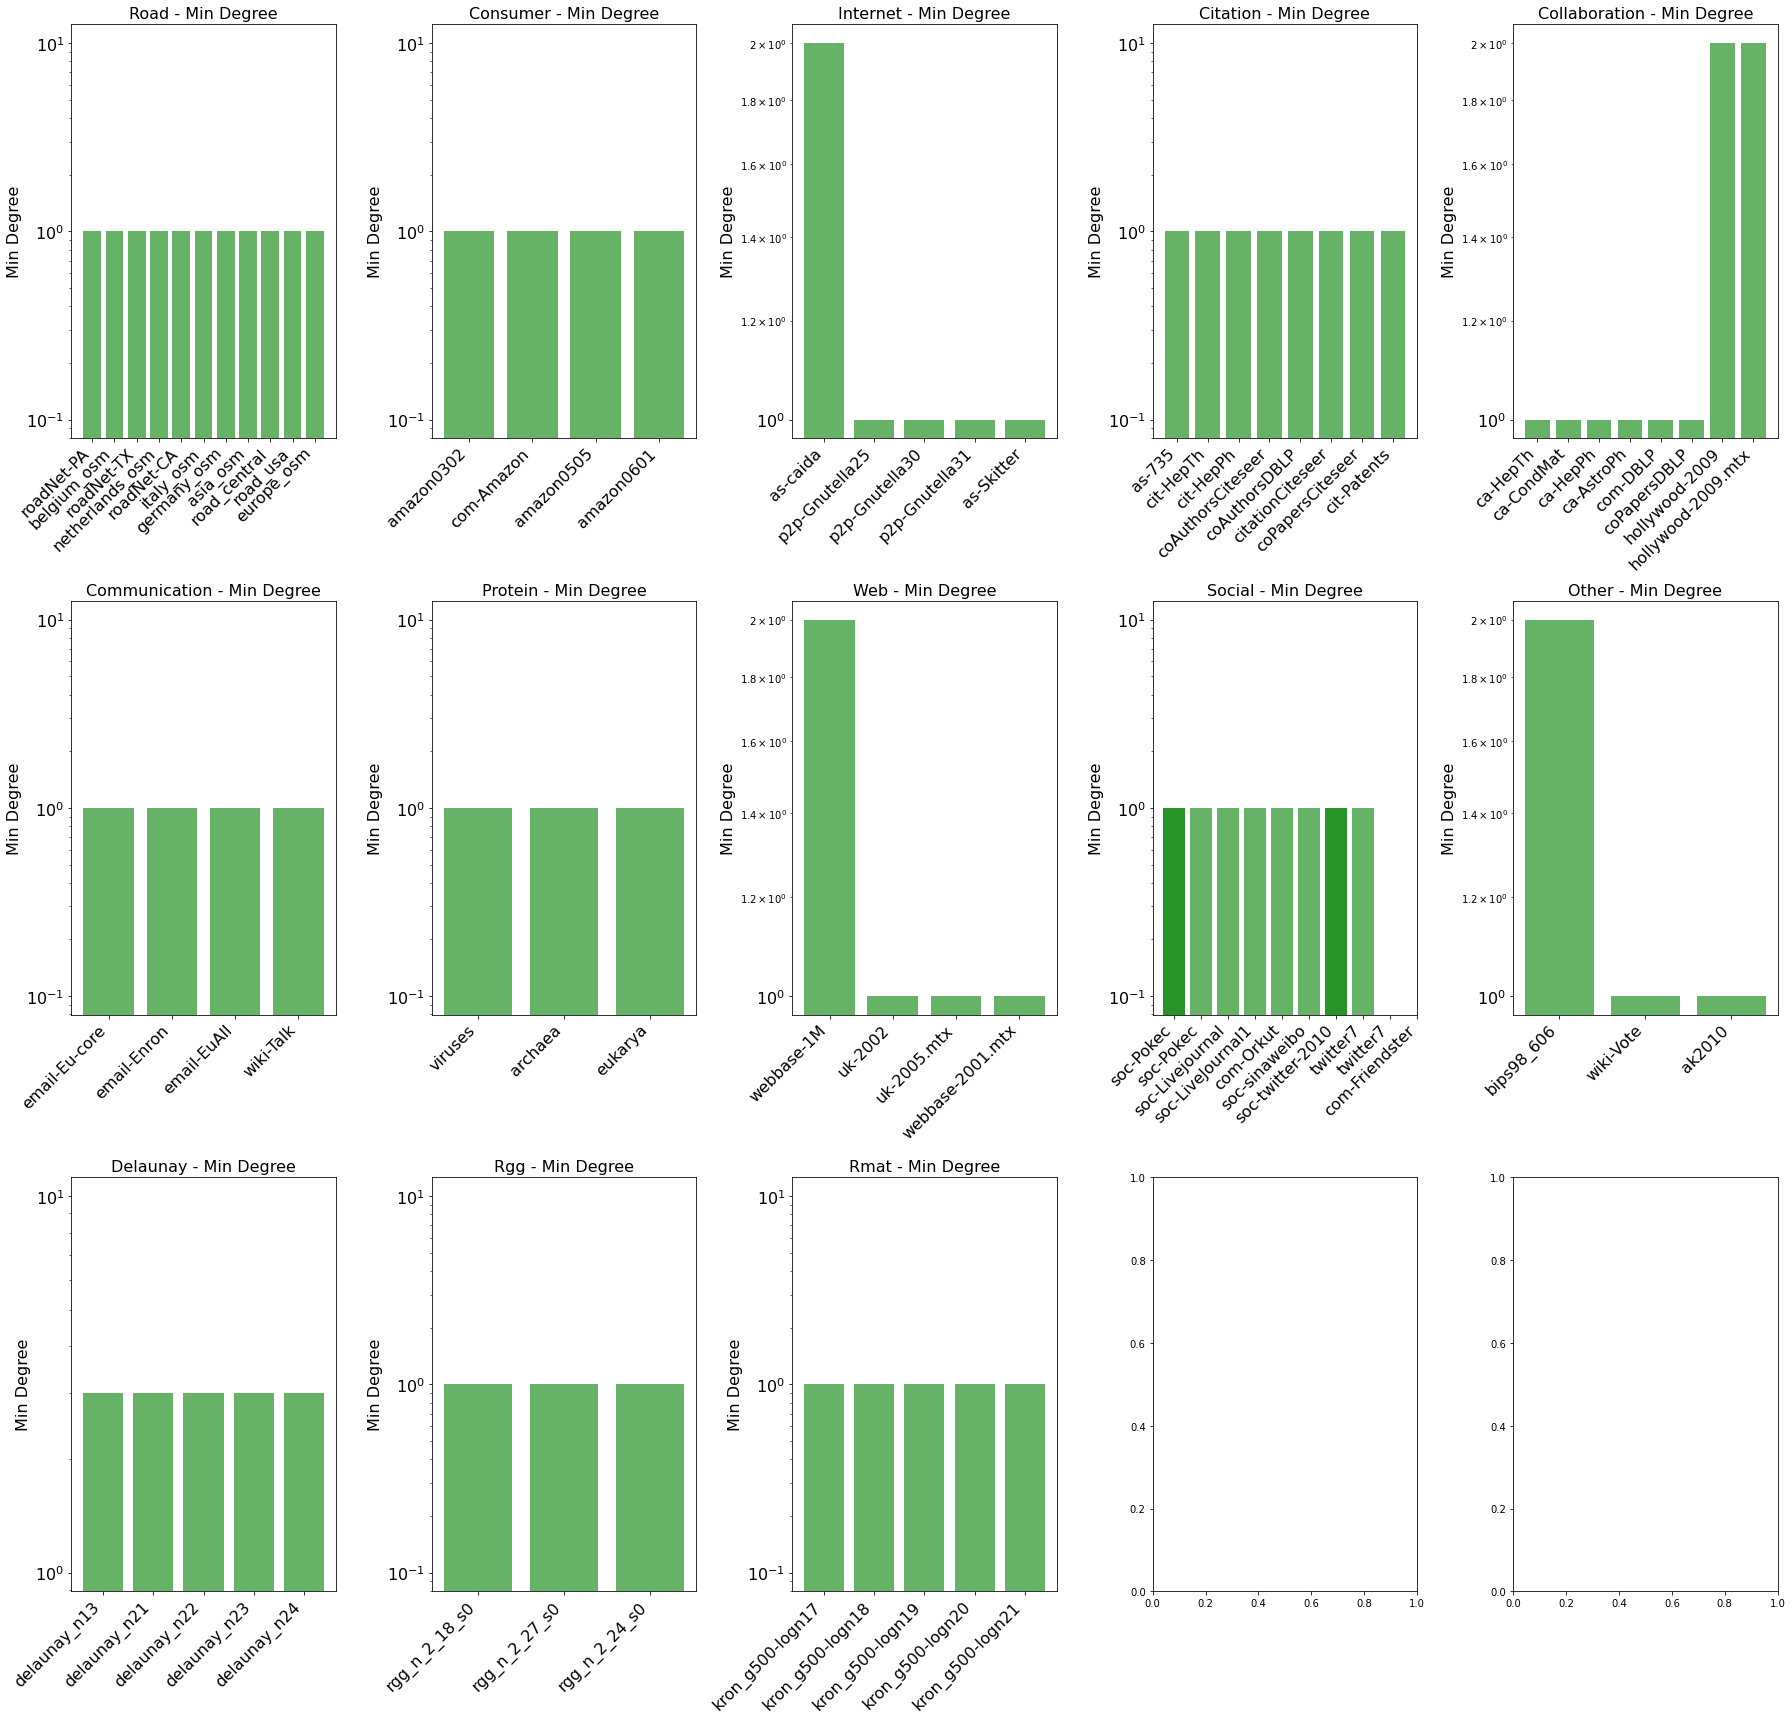

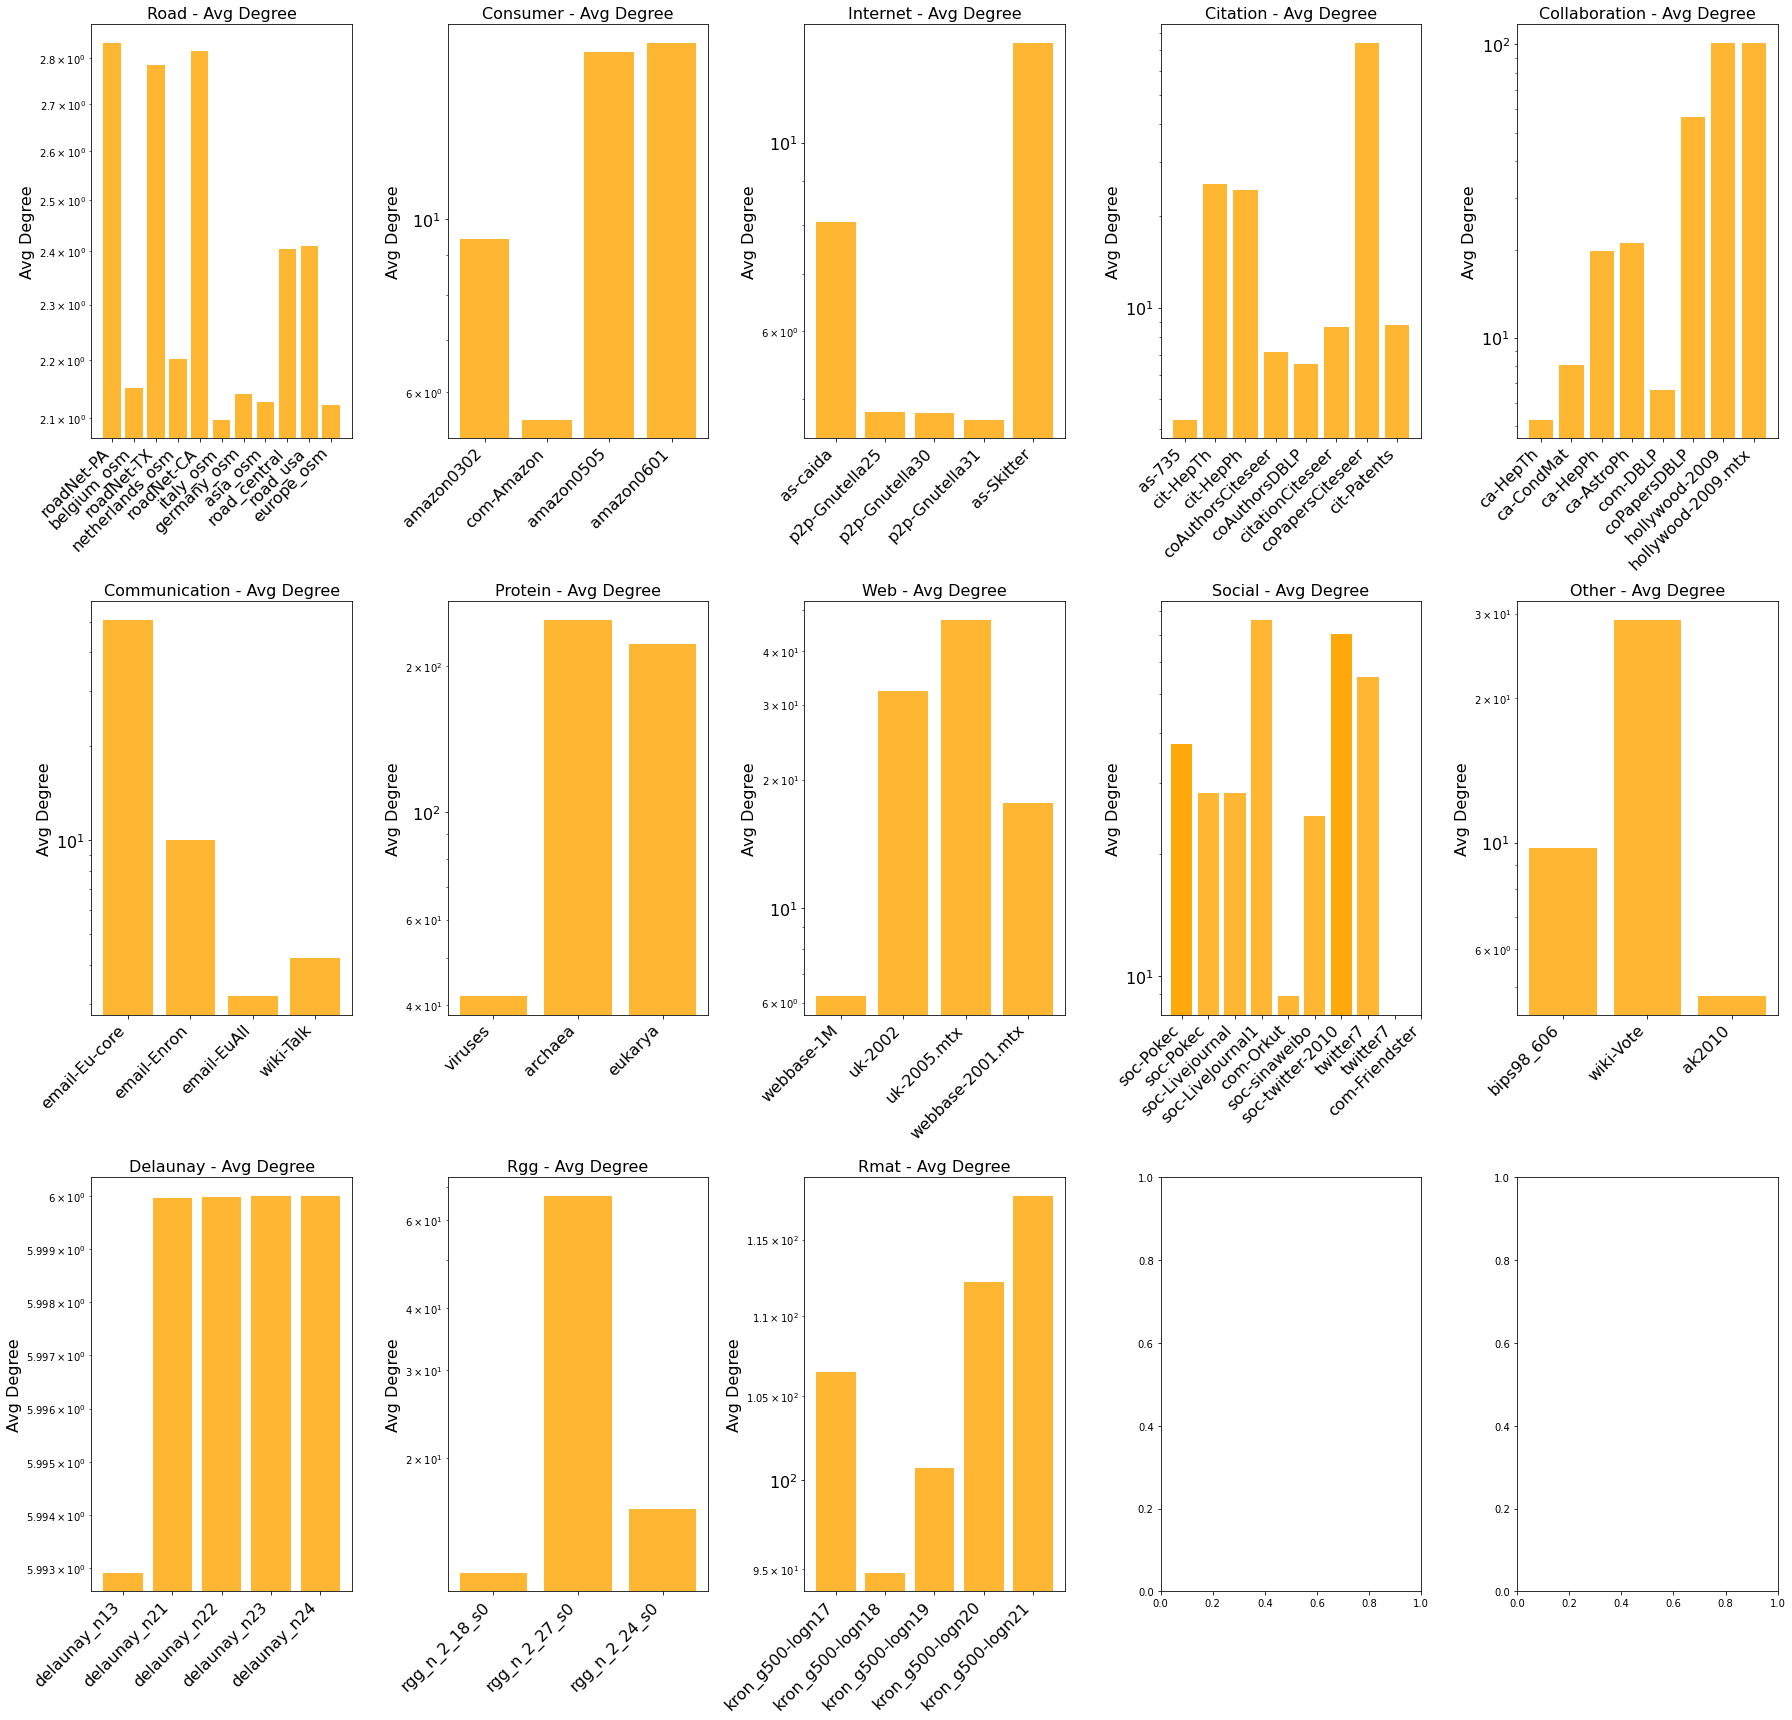

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import math

# Load the CSV file
file_path = 'degreestats.csv'
df = pd.read_csv(file_path)

# Ensure 'filename' and 'domain' are treated as strings
df['filename'] = df['filename'].astype(str)
df['domain'] = df['domain'].astype(str)

# Remove commas from 'edges' and convert to float
df['edges'] = df['edges'].str.replace(',', '').astype(float)

# Custom domain sort order
custom_domain_order = ["Road", "Consumer", "Internet", "Citation", "Collaboration", 
                       "Communication", "Protein", "Web", "Social", "Other", "Delaunay", "Rgg", "Rmat"]

# Set 'domain' as a categorical variable with the specified order and sort by 'domain' and 'edges'
df['domain'] = pd.Categorical(df['domain'], categories=custom_domain_order, ordered=True)
df = df.sort_values(by=['domain', 'edges'])

# Filter only domains with data
domains_with_data = [domain for domain in custom_domain_order if domain in df['domain'].values]
num_domains = len(domains_with_data)
# Check for NaN values in the relevant columns
nan_data = df[df[['max_degree', 'min_degree', 'avg_degree']].isna().any(axis=1)]
print("Rows with NaN values:\n", nan_data)

# Option 1: Remove rows with NaN values in 'max_degree', 'min_degree', or 'avg_degree'
df.dropna(subset=['max_degree', 'min_degree', 'avg_degree'], inplace=True)

# Option 2: Alternatively, fill NaN values with 0 or another value
# df[['max_degree', 'min_degree', 'avg_degree']] = df[['max_degree', 'min_degree', 'avg_degree']].fillna(0)

# Calculate rows and columns needed based on actual number of domains with data
n_cols = 5  # Set to 5 per row
n_rows = math.ceil(num_domains / n_cols)

# Font size parameters for ACM paper style
title_fontsize = 16
label_fontsize = 16
tick_fontsize = 16

# Create figures for each degree type without pre-allocating extra axes
fig_max, axs_max = plt.subplots(n_rows, n_cols, figsize=(25, 8 * n_rows), squeeze=False)
fig_min, axs_min = plt.subplots(n_rows, n_cols, figsize=(25, 8 * n_rows), squeeze=False)
fig_avg, axs_avg = plt.subplots(n_rows, n_cols, figsize=(25, 8 * n_rows), squeeze=False)

# Flatten axes and use only as many as needed based on domains with data
axs_max = axs_max.flatten()[:num_domains]
axs_min = axs_min.flatten()[:num_domains]
axs_avg = axs_avg.flatten()[:num_domains]

# Loop over each domain to create bar plots for max, min, and avg degrees
for i, domain in enumerate(domains_with_data):
    domain_data = df[df['domain'] == domain]  # Filter data for current domain

    # Plot max degree with log scale
    axs_max[i].bar(domain_data['filename'], domain_data['max_degree'], color='blue')
    axs_max[i].set_title(f'{domain} - Max Degree', fontsize=title_fontsize)
    axs_max[i].set_ylabel('Max Degree', fontsize=label_fontsize)
    axs_max[i].set_yscale('log')  # Log scale
    axs_max[i].set_xticks(range(len(domain_data['filename'])))
    axs_max[i].set_xticklabels(domain_data['filename'], rotation=45, ha='right', fontsize=tick_fontsize)
    axs_max[i].tick_params(axis='y', labelsize=tick_fontsize)

    # Plot min degree with log scale
    axs_min[i].bar(domain_data['filename'], domain_data['min_degree'], color='green', alpha=0.6)
    axs_min[i].set_title(f'{domain} - Min Degree', fontsize=title_fontsize)
    axs_min[i].set_ylabel('Min Degree', fontsize=label_fontsize)
    axs_min[i].set_yscale('log')  # Log scale
    axs_min[i].set_xticks(range(len(domain_data['filename'])))
    axs_min[i].set_xticklabels(domain_data['filename'], rotation=45, ha='right', fontsize=tick_fontsize)
    axs_min[i].tick_params(axis='y', labelsize=tick_fontsize)

    # Plot avg degree with log scale
    axs_avg[i].bar(domain_data['filename'], domain_data['avg_degree'], color='orange', alpha=0.8)
    axs_avg[i].set_title(f'{domain} - Avg Degree', fontsize=title_fontsize)
    axs_avg[i].set_ylabel('Avg Degree', fontsize=label_fontsize)
    axs_avg[i].set_yscale('log')  # Log scale
    axs_avg[i].set_xticks(range(len(domain_data['filename'])))
    axs_avg[i].set_xticklabels(domain_data['filename'], rotation=45, ha='right', fontsize=tick_fontsize)
    axs_avg[i].tick_params(axis='y', labelsize=tick_fontsize)

# After plotting each domain's data, remove empty subplots
for fig, axs in zip([fig_max, fig_min, fig_avg], [axs_max, axs_min, axs_avg]):
    for i in range(num_domains, len(axs)):
        fig.delaxes(axs[i])

# Adjust layout and save figures
fig_max.tight_layout()
fig_min.tight_layout()
fig_avg.tight_layout()

# Save the figures
fig_max.savefig('./max_degrees_subplot_acm.pdf', format='pdf')
fig_min.savefig('./min_degrees_subplot_acm.pdf', format='pdf')
fig_avg.savefig('./avg_degrees_subplot_acm.pdf', format='pdf')

print("The plots have been saved as 'max_degrees_subplot_acm.pdf', 'min_degrees_subplot_acm.pdf', and 'avg_degrees_subplot_acm.pdf'.")
